In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf





Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
#print(plt.rcParams['font.family'])

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare_ac = /usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumBarunGothic YetHangul = /usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumSquare_ac = /usr/share/fonts/truetype/nanum/NanumSquare_acR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumM

In [ ]:
df=pd.read_csv('/content/seoul.csv')

In [ ]:
df.shape

(132798, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132798 entries, 0 to 132797
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     132798 non-null  object 
 1   상호명        132798 non-null  object 
 2   지점명        0 non-null       float64
 3   상권업종대분류코드  132798 non-null  object 
 4   상권업종대분류명   132798 non-null  object 
 5   상권업종중분류코드  132798 non-null  object 
 6   상권업종중분류명   132798 non-null  object 
 7   상권업종소분류코드  132798 non-null  object 
 8   상권업종소분류명   132798 non-null  object 
 9   표준산업분류코드   132798 non-null  object 
 10  표준산업분류명    132798 non-null  object 
 11  시도코드       132798 non-null  int64  
 12  시도명        132798 non-null  object 
 13  시군구코드      132798 non-null  int64  
 14  시군구명       132798 non-null  object 
 15  행정동코드      132798 non-null  int64  
 16  행정동명       132798 non-null  object 
 17  법정동코드      132798 non-null  int64  
 18  법정동명       132798 non-null  object 
 19  지번코드       132798 non-n

In [ ]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
30394,MA010120220806955517,바이키강,NaN,G2,소매,G213,오락용품 소매,G21305,자전거 소매업,G47632,...,1168010300101930000021049,선테크빌딩,서울특별시 강남구 논현로 34,135962.0,6312.0,NaN,1,NaN,127.048769,37.474145


<Axes: >

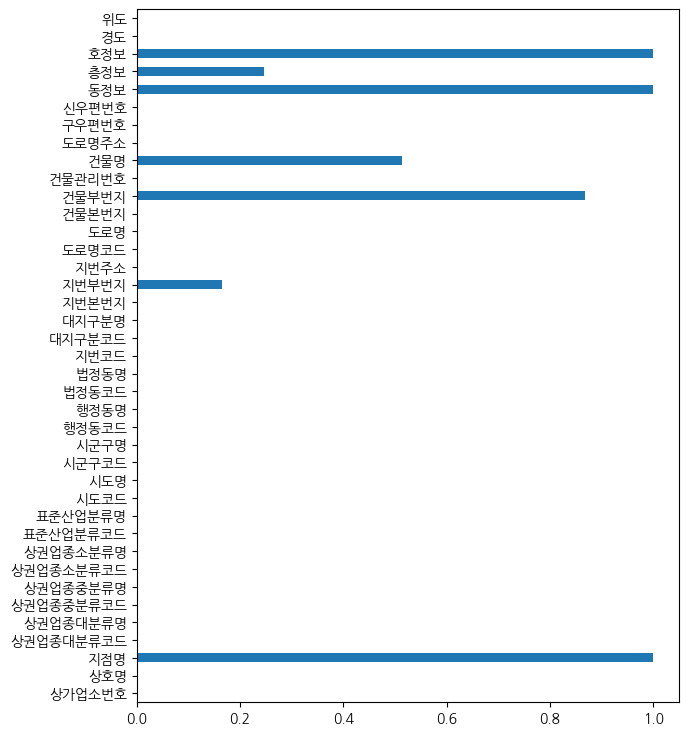

In [ ]:
###결측치 보기 -> 중요함
df.isnull().mean().plot.barh(figsize=(7,9))

In [ ]:
#사용하지 않는 컬러
#drop
col = ['상호명', '상권업종대분류명', '시군구명','경도','위도','시도명']

In [ ]:
df = df[col].copy()

In [ ]:
###서울특별시만 가져오기...
df.head()

,상호명,상권업종대분류명,시군구명,경도,위도,시도명
0,영자's곱창,음식,광진구,127.082832,37.568503,서울특별시
1,호텔클로이,숙박,중구,127.005849,37.565708,서울특별시
2,나라차중계태권도장,교육,노원구,127.076956,37.649226,서울특별시
3,이상한스냅,과학·기술,양천구,126.828832,37.542117,서울특별시
4,토끼정,음식,강서구,126.833022,37.560053,서울특별시


In [ ]:
df['시도명'].unique
###어떤 시군구명 있는지ㅣ 보고 가졍괴..
df['시군구명'].unique()

array(['광진구', '중구', '노원구', '양천구', '강서구', '송파구', '구로구', '강남구', '영등포구',
       '금천구', '마포구', '동작구', '성동구', '동대문구', '중랑구', '서초구', '은평구', '서대문구',
       '도봉구', '종로구', '관악구', '성북구', '강동구', '용산구', '강북구'], dtype=object)

In [ ]:
df=df.drop(['시도명'],axis=1)

In [ ]:
#상호명을 소문자로 바꾼 값을 저장하기
df['상호명_소문자'] = df['상호명'].str.lower()

In [ ]:
#베스킨라빈스 배스킨라빈스 baskinrobbins
#contains를 사용해 해당 글자가 있는 row만 가져오기
df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False)

<ipython-input-80-610844769a12>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False)


0         False
1         False
2         False
3         False
4         False
          ...  
132793    False
132794    False
132795    False
132796    False
132797    False
Name: 상호명_소문자, Length: 132798, dtype: bool

In [ ]:
df.loc[df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False), '상호명_소문자']

<ipython-input-81-f56bcca68cf6>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False), '상호명_소문자']


2110       비알배스킨라빈스한남hive
5209        비알배스킨라빈스동부이촌점
9630           배스킨라빈스상계역점
10223          배스킨라빈스길동역점
10559       비알배스킨라빈스서울대병원
               ...       
122918           배스킨라빈스방학
123082           배스킨라빈스금천
123546        배스킨라빈스신방화역점
126218        배스킨라빈스플로우도곡
129556    배스킨라빈스고속터미널경부선점
Name: 상호명_소문자, Length: 85, dtype: object

In [ ]:
#던킨 | dunkin
df.loc[df['상호명_소문자'].str.contains('던킨|dunkin').fillna(False), '상호명_소문자']

16461        비알던킨도너츠신림양지병원
23657             던킨도너츠동대문
24991           던킨도너츠목동남로점
28661                던킨도너츠
29717             던킨현대아이파크
32156                던킨상도점
32688            명성인터내셔널던킨
32712       배스킨라빈스/던킨흑석dt점
36641             던킨도너츠신도림
59346                 던킨금천
76440                던킨도너츠
78156                던킨도너츠
78706        던킨도너츠용산하나로마트점
81895       비알던킨도너츠강북구청사거리
83127       던킨도너츠한림대강남성심병원
90130     비알던킨도너츠공항철도서울역사점
94919            던킨도너츠역삼gs
97751               던킨군자역점
106290        비알던킨도너츠서울대병원
106992          던킨도너츠테크노마트
113859              던킨신풍역점
115884      비알던킨도너츠김포공항국내선
116673                  던킨
118332               던킨도너츠
121169          던킨도너츠영등포역사
Name: 상호명_소문자, dtype: object

In [ ]:
#던킨+배스킨라빈스
df_31 = df[df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins|던킨|dunki').fillna(False)].copy()

<ipython-input-83-d5898536417c>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_31 = df[df['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins|던킨|dunki').fillna(False)].copy()


In [ ]:
df_31

,상호명,상권업종대분류명,시군구명,경도,위도,상호명_소문자
2110,비알배스킨라빈스한남HIVE,음식,용산구,127.010579,37.535004,비알배스킨라빈스한남hive
5209,비알배스킨라빈스동부이촌점,음식,용산구,126.976135,37.518537,비알배스킨라빈스동부이촌점
9630,배스킨라빈스상계역점,음식,노원구,127.073221,37.659802,배스킨라빈스상계역점
10223,배스킨라빈스길동역점,음식,강동구,127.139247,37.537355,배스킨라빈스길동역점
10559,비알배스킨라빈스서울대병원,음식,종로구,126.997184,37.580448,비알배스킨라빈스서울대병원
...,...,...,...,...,...,...
122918,배스킨라빈스방학,음식,도봉구,127.042364,37.664710,배스킨라빈스방학
123082,배스킨라빈스금천,음식,금천구,126.892911,37.475608,배스킨라빈스금천
123546,배스킨라빈스신방화역점,음식,강서구,126.818751,37.567084,배스킨라빈스신방화역점
126218,배스킨라빈스플로우도곡,음식,강남구,127.038110,37.486367,배스킨라빈스플로우도곡


In [ ]:
df_31.loc[df_31['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False), '브랜드명'] = '배스킨라빈스'
#물결(~) 하면 반대가됨

<ipython-input-85-37a5b0aaa3f8>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_31.loc[df_31['상호명_소문자'].str.contains('(베|배)스킨라빈스|baskinrobbins').fillna(False), '브랜드명'] = '배스킨라빈스'


In [ ]:
df_31

,상호명,상권업종대분류명,시군구명,경도,위도,상호명_소문자,브랜드명
2110,비알배스킨라빈스한남HIVE,음식,용산구,127.010579,37.535004,비알배스킨라빈스한남hive,배스킨라빈스
5209,비알배스킨라빈스동부이촌점,음식,용산구,126.976135,37.518537,비알배스킨라빈스동부이촌점,배스킨라빈스
9630,배스킨라빈스상계역점,음식,노원구,127.073221,37.659802,배스킨라빈스상계역점,배스킨라빈스
10223,배스킨라빈스길동역점,음식,강동구,127.139247,37.537355,배스킨라빈스길동역점,배스킨라빈스
10559,비알배스킨라빈스서울대병원,음식,종로구,126.997184,37.580448,비알배스킨라빈스서울대병원,배스킨라빈스
...,...,...,...,...,...,...,...
122918,배스킨라빈스방학,음식,도봉구,127.042364,37.664710,배스킨라빈스방학,배스킨라빈스
123082,배스킨라빈스금천,음식,금천구,126.892911,37.475608,배스킨라빈스금천,배스킨라빈스
123546,배스킨라빈스신방화역점,음식,강서구,126.818751,37.567084,배스킨라빈스신방화역점,배스킨라빈스
126218,배스킨라빈스플로우도곡,음식,강남구,127.038110,37.486367,배스킨라빈스플로우도곡,배스킨라빈스


In [ ]:
df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')

In [ ]:
df_31

,상호명,상권업종대분류명,시군구명,경도,위도,상호명_소문자,브랜드명
2110,비알배스킨라빈스한남HIVE,음식,용산구,127.010579,37.535004,비알배스킨라빈스한남hive,배스킨라빈스
5209,비알배스킨라빈스동부이촌점,음식,용산구,126.976135,37.518537,비알배스킨라빈스동부이촌점,배스킨라빈스
9630,배스킨라빈스상계역점,음식,노원구,127.073221,37.659802,배스킨라빈스상계역점,배스킨라빈스
10223,배스킨라빈스길동역점,음식,강동구,127.139247,37.537355,배스킨라빈스길동역점,배스킨라빈스
10559,비알배스킨라빈스서울대병원,음식,종로구,126.997184,37.580448,비알배스킨라빈스서울대병원,배스킨라빈스
...,...,...,...,...,...,...,...
122918,배스킨라빈스방학,음식,도봉구,127.042364,37.664710,배스킨라빈스방학,배스킨라빈스
123082,배스킨라빈스금천,음식,금천구,126.892911,37.475608,배스킨라빈스금천,배스킨라빈스
123546,배스킨라빈스신방화역점,음식,강서구,126.818751,37.567084,배스킨라빈스신방화역점,배스킨라빈스
126218,배스킨라빈스플로우도곡,음식,강남구,127.038110,37.486367,배스킨라빈스플로우도곡,배스킨라빈스


In [ ]:
#잘됐는지 확인.. isin을 이용하여 상권업종대분류명== 음식인것만 남기기
df_31['상권업종대분류명'].value_counts()

음식    108
소매      1
Name: 상권업종대분류명, dtype: int64

In [ ]:
df_31[df_31['상권업종대분류명'].isin(['소매'])]

,상호명,상권업종대분류명,시군구명,경도,위도,상호명_소문자,브랜드명
59346,던킨금천,소매,금천구,126.90228,37.465009,던킨금천,던킨도너츠


In [ ]:
df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매'])].copy()

In [ ]:
df_31['상권업종대분류명'].value_counts()

음식    108
Name: 상권업종대분류명, dtype: int64

<Axes: >

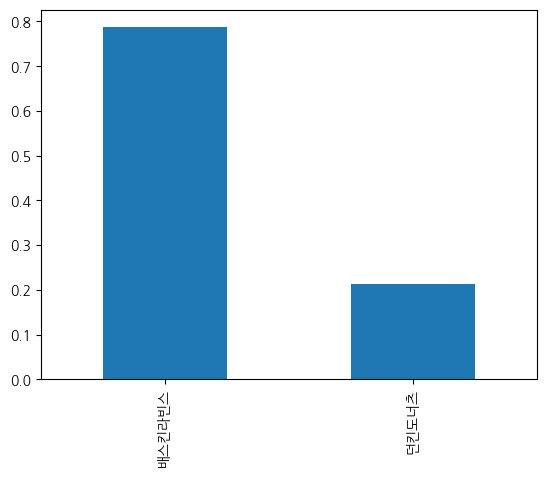

In [ ]:
#normalize로
df_31['브랜드명'].value_counts(normalize=True).plot.bar()

In [ ]:
brand_count=df_31['브랜드명'].value_counts()

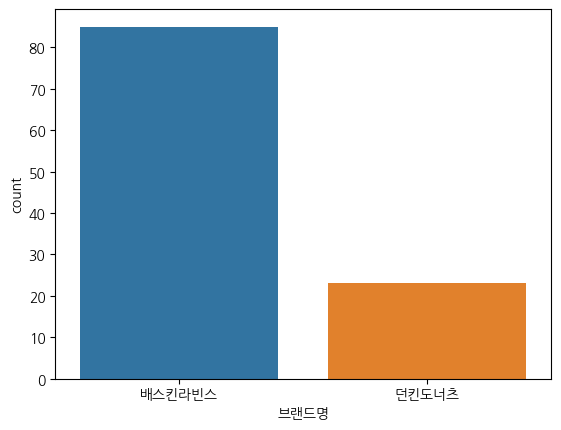

In [ ]:
#countplot그리기
g=sns.countplot(data=df_31, x='브랜드명',order=brand_count.index)

In [ ]:

for i, val in enumerate(brand_count.index) :
  g.text(x=1, y=brand_count[i], s=brand_count[i])

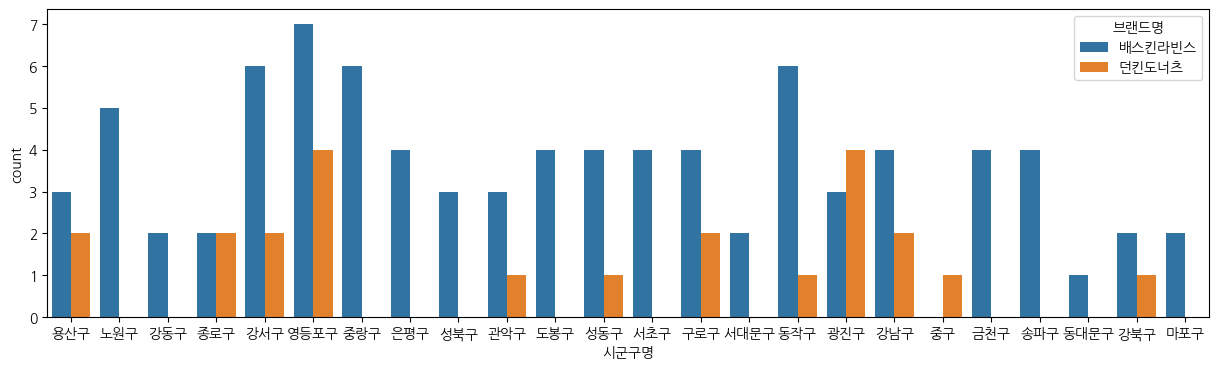

In [ ]:
plt.figure(figsize=(15,4))
g=sns.countplot(data=df_31,x='시군구명',hue='브랜드명')

In [ ]:
table_city_brand = df_31.pivot_table(index='시군구명', columns='브랜드명', values='상호명', aggfunc='count')

In [ ]:
table_city_brand

브랜드명,던킨도너츠,배스킨라빈스
시군구명,,
강남구,2.0,4.0
강동구,NaN,2.0
강북구,1.0,2.0
강서구,2.0,6.0
관악구,1.0,3.0
광진구,4.0,3.0
구로구,2.0,4.0
금천구,NaN,4.0
노원구,NaN,5.0


In [ ]:
for i, val in table_city_brand.iterrows():
  dunkin = val['던킨도너츠']
  baskin = val['배스킨라빈스']
  print(dunkin, baskin)

2.0 4.0
nan 2.0
1.0 2.0
2.0 6.0
1.0 3.0
4.0 3.0
2.0 4.0
nan 4.0
nan 5.0
nan 4.0
nan 1.0
1.0 6.0
nan 2.0
nan 2.0
nan 4.0
1.0 4.0
nan 3.0
nan 4.0
4.0 7.0
2.0 3.0
nan 4.0
2.0 2.0
1.0 nan
nan 6.0


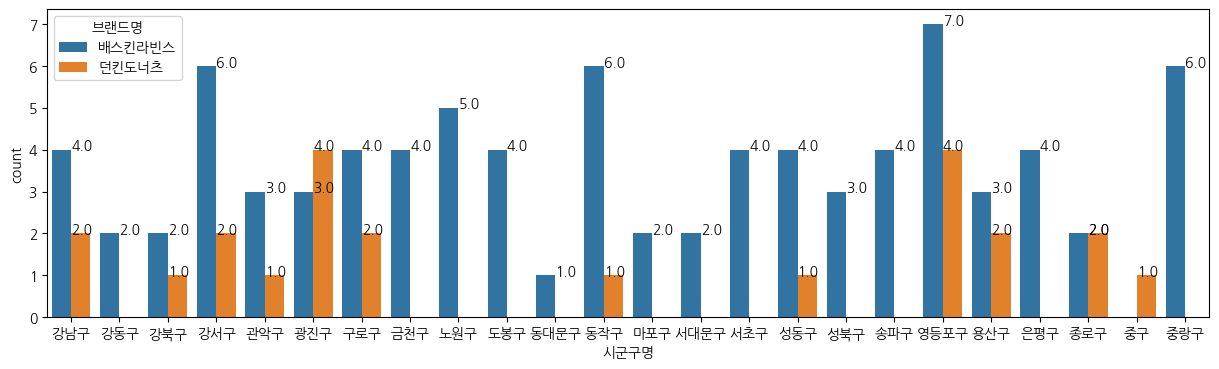

In [ ]:
plt.figure(figsize=(15,4))
g=sns.countplot(data=df_31, x='시군구명', hue='브랜드명', order=table_city_brand.index)

index_no = 0
for i, val in table_city_brand.iterrows():
  dunkin = val['던킨도너츠']
  baskin=val['배스킨라빈스']
  g.text(x=index_no, y=dunkin, s=dunkin)
  g.text(x=index_no, y=baskin, s=baskin)
  index_no=index_no+1



<Axes: xlabel='위도', ylabel='경도'>

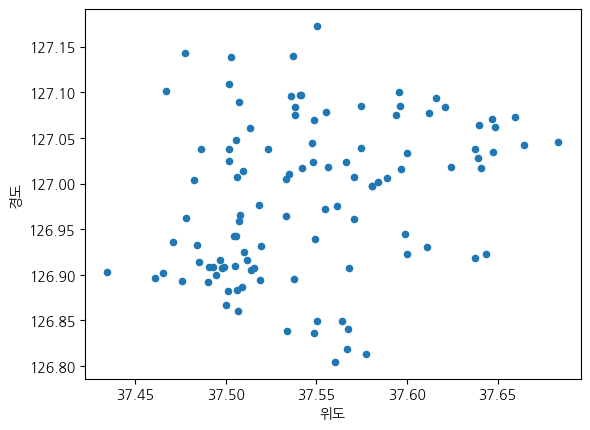

In [ ]:
###scatterplot
df_31[['위도','경도']].plot.scatter(x='위도', y='경도')

<Axes: xlabel='경도', ylabel='위도'>

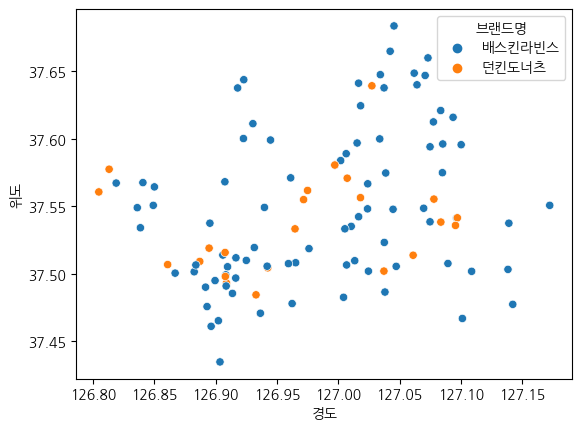

In [ ]:
# seaborn의 scatterplot으로hue에 베라 던킨 구분
sns.scatterplot(data=df_31, x='경도',y='위도',hue='브랜드명')

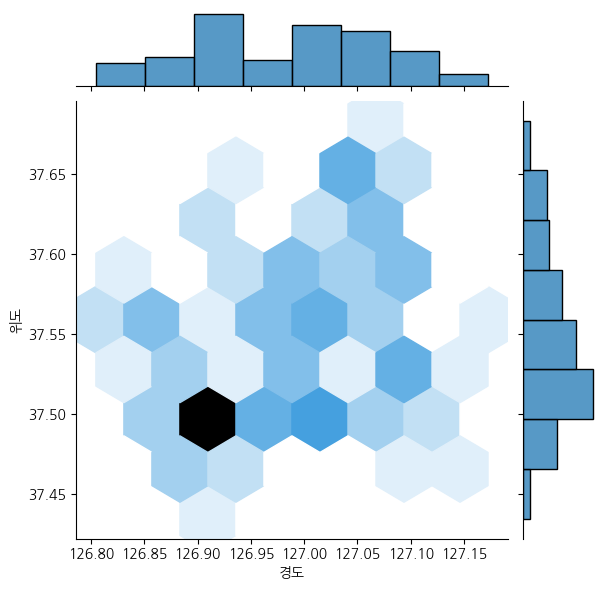

In [ ]:
#jlintplot
sns.jointplot(data=df_31, x='경도',y='위도', kind='hex')

In [ ]:
import folium
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구한다

lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long


(37.54661861632438, 126.98365515541593)

In [ ]:
m = folium.Map([lat, long])
# 127.039032	37.495593
folium.Marker(
    [37.495593, 127.039032],
    popup='<i>던킨도너츠</i>',
    tooltip="던킨도너츠").add_to(m)
m.save('index.html')


In [ ]:
df_31.index

Int64Index([  2110,   5209,   9630,  10223,  10559,  11208,  12869,  14374,
             15378,  15764,
            ...
            117552, 118332, 121169, 121187, 121837, 122918, 123082, 123546,
            126218, 129556],
           dtype='int64', length=108)

In [ ]:
# 기본 마커
m = folium.Map([lat, long], zoom_start = 12)

for i in df_31.index:

    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]

    icon_color = "orange"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "blue"

    folium.Marker(
        [sub_lat, sub_long],
        icon = folium.Icon(color=icon_color)).add_to(m)

m.save('index.html')
m

In [ ]:
#마커 클러스터로 시각화

from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:

    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]

    icon_color = "orange"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "blue"

    folium.Marker(
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color)).add_to(marker_cluster)

m.save('index.html')
m

In [124]:
#선형회귀에 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [140]:
# 사용할 컬럼 선택
col = ['경도', '위도']
df_location = df[col].copy()

# # NaN 값을 포함한 행 삭제
# df_location = df_location.dropna()


In [156]:
# 선형회귀를 위한 데이터 전처리
x = df_location[['경도']]
y = df_location['위도']

In [157]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [166]:
#NaN 값 확인
df_location.isnull().sum()

#무한대값 확인
np.isinf(df_location).sum()

# 데이터 형태 확인
print(x_train.shape)
print(y_train.shape)

(106237, 1)
(106237,)


In [164]:
# 선형회귀 모델 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [171]:
# 예측
y_pred = model.predict(x_test)


In [169]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0023051395044852816


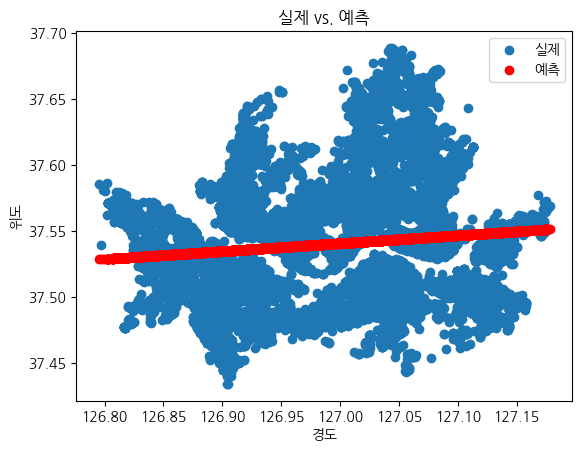

In [174]:
# 시각화 - 실제값 vs. 예측값
plt.scatter(x_test, y_test, label='실제')
plt.scatter(x_test, y_pred, label='예측', color='red')
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('실제 vs. 예측')
plt.legend()
plt.show()

In [176]:
# 회귀식 및 최적의 위치 출력
print(f'기울기 (m): {model.coef_[0]}')
print(f'y 절편 (b): {model.intercept_}')

# 최적의 위치 계산
optimal_location = -model.intercept_ / model.coef_[0]
print(f'최적의 위치 (경도): {optimal_location}')

기울기 (m): 0.05986563331447698
y 절편 (b): 29.937658864116443
최적의 위치 (경도): -500.08088458452477
